# Linear Regression from Scratch in Python


Implementation of Univariate Linear Regression from scratch in Python  on **Boston Housing Dataset**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

c:\users\sayans~1\anacon~1\envs\ml_algo_from_scratch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
c:\users\sayans~1\anacon~1\envs\ml_algo_from_scratch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
c:\users\sayans~1\anacon~1\envs\ml_algo_from_scratch\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


## Importing Dataset

In [6]:
##training_data = pd.read_csv('Dataset/train.csv')
##training_data.head()
from sklearn.datasets import load_boston
dataset = load_boston()
boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston['MEDV'] = dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA on dataset

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## We can infer that no categorical data is present in dataset

In [8]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## We can infer that there are no missing values in Dataset

## Data visualization

In [9]:
def plot_features(columns, title):
    plt.figure(figsize=(10,14))
    i = 0
    for col in columns:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(boston[col], boston['MEDV'], marker = '.', linestyle = 'none')
        plt.title(title%(col))
        plt.tight_layout()

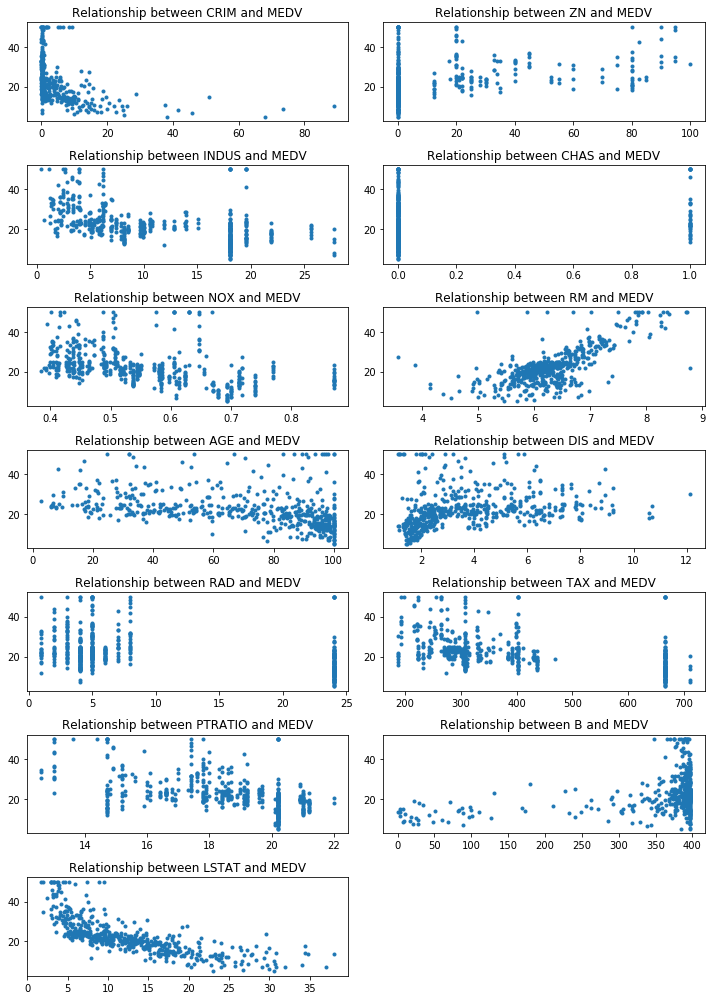

In [10]:
plot_features(boston.columns[0:len(boston.columns)-1],"Relationship between %s and MEDV")

### These graphs gives a clear intuition that RM has very linear relationship with MEDV.

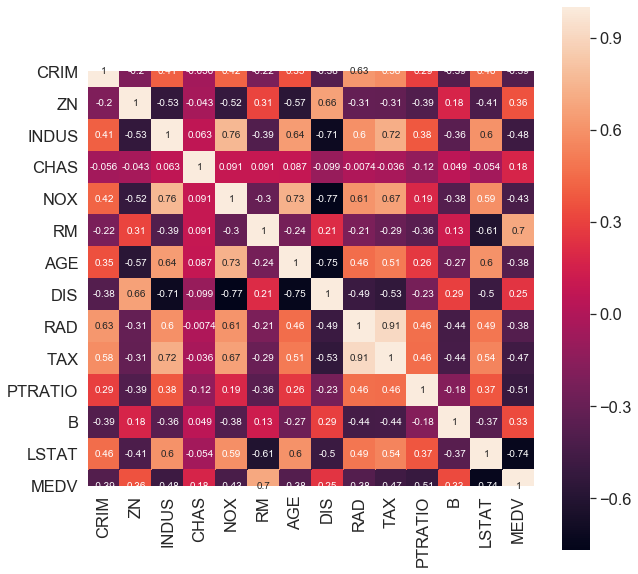

In [12]:
fig = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(boston.corr(),square=True,annot=True,annot_kws={'size': 10})
plt.show()

### MEDV has correlation coefficient of 0.7 with RM which means they vary linearly as compared to other features. So we will consider only this feature for our Linear Regression

In [13]:
def predictPrice(x,theta):
    return np.dot(x,theta)

#Loss/Cost function: Mean Squared Error Implementation
def calculateCost(x, theta, Y):
    prediction = predictPrice(x, theta)
    return ((prediction - Y)**2).mean()/2

### Defining *abline* method which is a utility function to make graphs after every 1000 iteration to visualise the fitted line. It plots a line from slope and intercept

In [24]:
def abline(x, theta, Y):
    y_pred = predictPrice(x, theta)
    plt.xlim(0, 20)
    plt.ylim(-10, 60)
    plt.xlabel('No. of Rooms in the house')
    plt.ylabel('Price of house')
    plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,Y,'.',x, y_pred, '-')
    plt.show()

## Defining Method for applying *Gradient Descent* to minimize loss function

In [25]:
def Gradient_Descent_Linear_Regression(alpha = 0.042, iter = 5000):
    theta0 = []
    theta1 = []
    costs = []
    predictor = boston['RM']
    x = np.column_stack((np.ones(len(predictor)), predictor))
    Y = boston['MEDV']
    theta = np.zeros(2)
    for i in range(iter):
        pred = predictPrice(x,theta)
        t0 = theta[0] - alpha*(pred - Y).mean()
        t1 = theta[1] - alpha*((pred - Y)*x[:,1]).mean()
        
        theta = np.array([t0,t1])
        J = calculateCost(x, theta, Y)
        theta0.append(t0)
        theta1.append(t1)
        costs.append(J)
        if i%1000 == 0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,Y)
    print(f'theta0 = {len(theta0)}\ntheta1 = {len(theta1)}\nCosts = {len(costs)}')

Iteration: 1,Cost = 168.06039190321872,theta = [0.94637787 6.13599063]


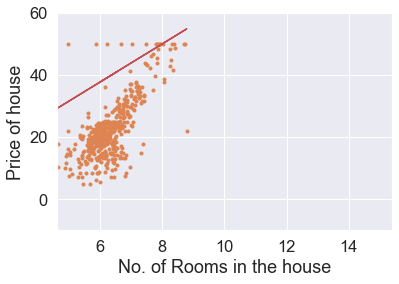

Iteration: 1001,Cost = 24.581741617147905,theta = [-13.42188276   5.76169964]


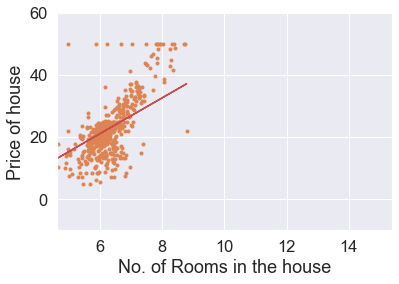

Iteration: 2001,Cost = 22.813096798511783,theta = [-21.84841876   7.08639382]


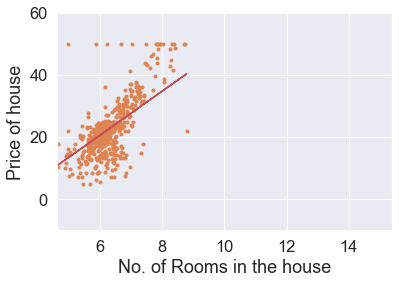

Iteration: 3001,Cost = 22.169076475152288,theta = [-26.93327353   7.88575877]


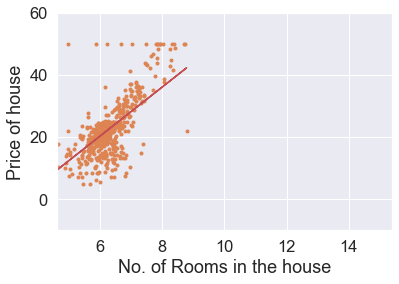

Iteration: 4001,Cost = 21.93456801278056,theta = [-30.00164564   8.36812242]


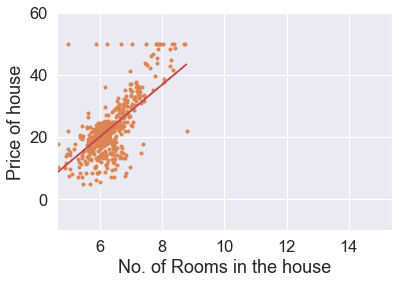

theta0 = 5000
theta1 = 5000
Costs = 5000


In [26]:
Gradient_Descent_Linear_Regression()

## We have obtained our best fit line and predictions can be made from here